# Database comparisons
The purpose of this notebook is to evaluate classification accuracy between different reference databases. Select mock community sequences are taxonomically classified using two or more different reference databases, e.g., Greengenes 13_8 [trimmed to 250 nt](./generate-tax-assignments.ipynb) and the same database [trimmed to 150 nt](./generate-tax-assignments-trimmed-dbs.ipynb). [This notebook](./generate-tax-assignments-trimmed-dbs.ipynb) can also be modified to provide taxonomic classification with any number of desired reference databases/versions. Limit the analysis to only a few mock communities and method/parameter combinations; the goal here is to compare the databases, not the methods.

Prepare the environment
-----------------------

First we'll import various functions that we'll need for generating the report. 

In [31]:
%matplotlib inline

from os.path import join, expandvars
import pandas as pd
from IPython.display import display

from tax_credit.framework_functions import (pointplot_from_data_frame,
                                            per_level_kruskal_wallis)
from tax_credit.eval_framework import (boxplot_from_data_frame,
                                       heatmap_from_data_frame,
                                       method_by_dataset_a1,
                                       method_by_dataset_a2,
                                       evaluate_results,
                                       parameter_comparisons,
                                       method_by_dataset)

Configure local environment-specific values
-------------------------------------------

**This is the only cell that you will need to edit to generate basic reports locally.** After editing this cell, you can run all cells in this notebook to generate your analysis report. This will take a few minutes to run, as results are computed at multiple taxonomic levels.

Values in this cell will not need to be changed, with the exception of ``project_dir``, to generate the default results contained within tax-credit. To analyze results separately from the tax-credit precomputed results, other variables in this cell will need to be set.

In [32]:
## project_dir should be the directory where you've downloaded (or cloned) the 
## short-read-tax-assignment repository. 
project_dir = expandvars("$HOME/Desktop/projects/short-read-tax-assignment")

## precomputed_results_dir is the directory containing taxonomy assignment
## results to compare. Defaults to the precomputed results in tax-credit
precomputed_results_dir = join(project_dir, "data/precomputed-results/")

## expected_results_dir contains expected composition data in the structure
## expected_results_dir/<dataset name>/<reference name>/expected/
expected_results_dir = join(precomputed_results_dir, "mock-community")

## mock_results_fp designates the files to which summary results are written.
## If this file exists, it can be read in to generate results plots, instead
## of computing new scores.
mock_results_fp = join(expected_results_dir, 'mock_results.tsv')

## results_dirs should contain the directory or directories where
## results can be found. By default, this is just the precomputed 
## results included with the project. If other results should be included, 
## absolute paths to those directories should be added to this list.
results_dirs = [precomputed_results_dir]

## Minimum number of times an OTU must be observed for it to be included in analyses. Edit this
## to analyze the effect of the minimum count on taxonomic results.
min_count = 1

## Define the range of taxonomic levels over which to compute accuracy scores.
## The default given below will compute order (level 2) through species (level 6)
taxonomy_level_range = range(2,7)

Find mock community pre-computed tables, expected tables, and "query" tables
----------------------------------------------------------------------------

Next we'll use the paths defined above to find all of the tables that will be compared. These include the *pre-computed result* tables (i.e., the ones that the new methods will be compared to), the *expected result* tables (i.e., the tables containing the known composition of the mock microbial communities), and the *query result* tables (i.e., the tables generated with the new method(s) that we want to compare to the *pre-computed result* tables).

In [33]:
mock_results = evaluate_results(results_dirs, 
                                expected_results_dir, 
                                mock_results_fp, 
                                taxonomy_level_range=range(2,7), 
                                min_count=1,
                                taxa_to_keep=None, 
                                md_key='a', 
                                subsample=False,
                                force=False)

/Users/nbokulich/Desktop/projects/short-read-tax-assignment/data/precomputed-results/mock-community/mock_results.tsv already exists.
Reading in pre-computed evaluation results.
To overwrite, set force=True


In [37]:
mock_results

Dataset  Level                SampleID             Reference Method  \
1625  mock-3      2       HMPMockV1.1.Even1          gg_13_8_otus    rdp   
1626  mock-3      2       HMPMockV1.1.Even2          gg_13_8_otus    rdp   
1627  mock-3      2  HMPMockV1.2.Staggered1          gg_13_8_otus    rdp   
1628  mock-3      2  HMPMockV1.2.Staggered2          gg_13_8_otus    rdp   
1629  mock-3      3       HMPMockV1.1.Even1          gg_13_8_otus    rdp   
1630  mock-3      3       HMPMockV1.1.Even2          gg_13_8_otus    rdp   
1631  mock-3      3  HMPMockV1.2.Staggered1          gg_13_8_otus    rdp   
1632  mock-3      3  HMPMockV1.2.Staggered2          gg_13_8_otus    rdp   
1633  mock-3      4       HMPMockV1.1.Even1          gg_13_8_otus    rdp   
1634  mock-3      4       HMPMockV1.1.Even2          gg_13_8_otus    rdp   
1635  mock-3      4  HMPMockV1.2.Staggered1          gg_13_8_otus    rdp   
1636  mock-3      4  HMPMockV1.2.Staggered2          gg_13_8_otus    rdp   
1637  mock-3      5       HMPMockV1.1.Even1          gg_13_8_otus    rdp   
1638  mock-3      5       HMPMockV1.1.Even2          gg_13_8_otus    rdp   
1639  mock-3      5  HMPMockV1.2.Staggered1          gg_13_8_otus    rdp   
1640  mock-3      5  HMPMockV1.2.Staggered2          gg_13_8_otus    rdp   
1641  mock-3      6       HMPMockV1.1.Even1          gg_13_8_otus    rdp   
1642  mock-3      6       HMPMockV1.1.Even2          gg_13_8_otus    rdp   
1643  mock-3      6  HMPMockV1.2.Staggered1          gg_13_8_otus    rdp   
1644  mock-3      6  HMPMockV1.2.Staggered2          gg_13_8_otus    rdp   
2925  mock-3      2       HMPMockV1.1.Even1  gg_13_8_otus_trim150    rdp   
2926  mock-3      2       HMPMockV1.1.Even2  gg_13_8_otus_trim150    rdp   
2927  mock-3      2  HMPMockV1.2.Staggered1  gg_13_8_otus_trim150    rdp   
2928  mock-3      2  HMPMockV1.2.Staggered2  gg_13_8_otus_trim150    rdp   
2929  mock-3      3       HMPMockV1.1.Even1  gg_13_8_otus_trim150    rdp   
2930  mock-3      3       HMPMockV1.1.Even2  gg_13_8_otus_trim150    rdp   
2931  mock-3      3  HMPMockV1.2.Staggered1  gg_13_8_otus_trim150    rdp   
2932  mock-3      3  HMPMockV1.2.Staggered2  gg_13_8_otus_trim150    rdp   
2933  mock-3      4       HMPMockV1.1.Even1  gg_13_8_otus_trim150    rdp   
2934  mock-3      4       HMPMockV1.1.Even2  gg_13_8_otus_trim150    rdp   
...      ...    ...                     ...                   ...    ...   
1835  mock-3      4  HMPMockV1.2.Staggered1          gg_13_8_otus    rdp   
1836  mock-3      4  HMPMockV1.2.Staggered2          gg_13_8_otus    rdp   
1837  mock-3      5       HMPMockV1.1.Even1          gg_13_8_otus    rdp   
1838  mock-3      5       HMPMockV1.1.Even2          gg_13_8_otus    rdp   
1839  mock-3      5  HMPMockV1.2.Staggered1          gg_13_8_otus    rdp   
1840  mock-3      5  HMPMockV1.2.Staggered2          gg_13_8_otus    rdp   
1841  mock-3      6       HMPMockV1.1.Even1          gg_13_8_otus    rdp   
1842  mock-3      6       HMPMockV1.1.Even2          gg_13_8_otus    rdp   
1843  mock-3      6  HMPMockV1.2.Staggered1          gg_13_8_otus    rdp   
1844  mock-3      6  HMPMockV1.2.Staggered2          gg_13_8_otus    rdp   
3125  mock-3      2       HMPMockV1.1.Even1  gg_13_8_otus_trim150    rdp   
3126  mock-3      2       HMPMockV1.1.Even2  gg_13_8_otus_trim150    rdp   
3127  mock-3      2  HMPMockV1.2.Staggered1  gg_13_8_otus_trim150    rdp   
3128  mock-3      2  HMPMockV1.2.Staggered2  gg_13_8_otus_trim150    rdp   
3129  mock-3      3       HMPMockV1.1.Even1  gg_13_8_otus_trim150    rdp   
3130  mock-3      3       HMPMockV1.1.Even2  gg_13_8_otus_trim150    rdp   
3131  mock-3      3  HMPMockV1.2.Staggered1  gg_13_8_otus_trim150    rdp   
3132  mock-3      3  HMPMockV1.2.Staggered2  gg_13_8_otus_trim150    rdp   
3133  mock-3      4       HMPMockV1.1.Even1  gg_13_8_otus_trim150    rdp   
3134  mock-3      4       HMPMockV1.1.Even2  gg_13_8_otus_trim150    rdp   
3135  mock-3      4  HMPMockV1.2.Staggered1  gg_13_8_

Restrict analyses to a set of datasets used for purpose of reference database comparisons.

In [36]:
mock_results = mock_results[mock_results['Dataset'] == 'mock-3']
mock_results = mock_results[mock_results['Method'] == 'rdp']

Evalution 1: Compute and summarize precision, recall, and F-measure for mock communities
----------------------------------------------------------------------------------------

In this evaluation, we compute and summarize precision, recall, and F-measure of each result (pre-computed and query) based on the known composition of the mock communities. We then summarize the results in two ways: first with boxplots, and second with a table of the top methods based on their F-measures. 

This is a qualitative evaluation, effectively telling us about the ability of the different methods to report the taxa that are present in each sample. These metrics are not concerned with the abundance of the different taxa.

As a first step, we will evaluate how accuracy metrics perform at each taxonomic level for each method within each reference dataset type.

In [43]:
color_pallette = dict(gg_13_8_otus="seagreen", gg_13_8_otus_trim150="blue")

y_vars = ["Precision", "Recall", "F-measure"]

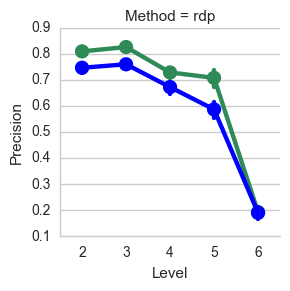

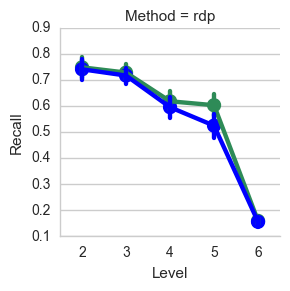

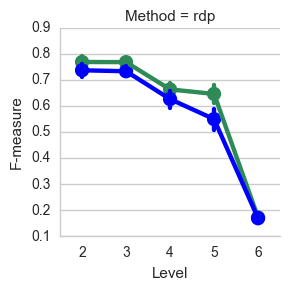

In [50]:
pointplot_from_data_frame(mock_results, "Level", y_vars, 
                          group_by="Method", color_by="Reference",
                          color_pallette=color_pallette)

Kruskal-Wallis FDR-corrected p-values comparing classification methods at each level of taxonomic assignment

In [47]:
result = per_level_kruskal_wallis(mock_results, y_vars, group_by='Reference', 
                                  dataset_col='Method', level_name='Level',
                                  levelrange=range(2,7), alpha=0.05, 
                                  pval_correction='fdr_bh')
result

Dataset   Variable         2         3         4             5         6
0     rdp  Precision  0.000011  0.000001  0.000002  1.784917e-08  0.893326
1     rdp     Recall  0.893326  0.888950  0.758371  8.249317e-03  0.893326
2     rdp  F-measure  0.071812  0.018148  0.034805  6.795040e-04  0.893326

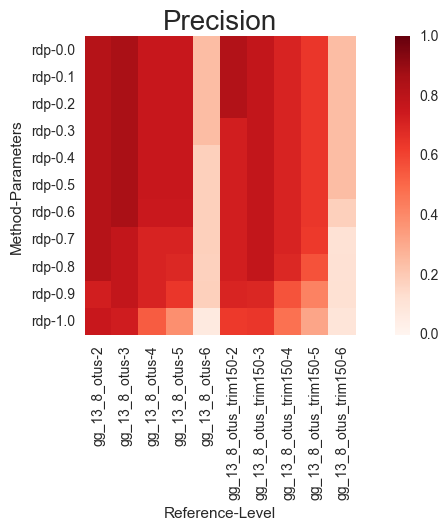

In [48]:
heatmap_from_data_frame(mock_results, metric="Precision", rows=["Method", "Parameters"], cols=["Reference", "Level"])

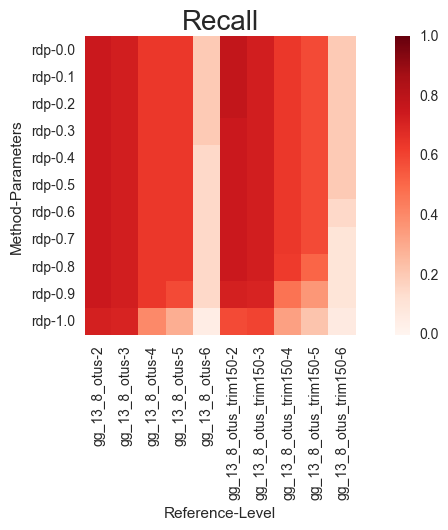

In [51]:
heatmap_from_data_frame(mock_results, metric="Recall", rows=["Method", "Parameters"], cols=["Reference", "Level"])

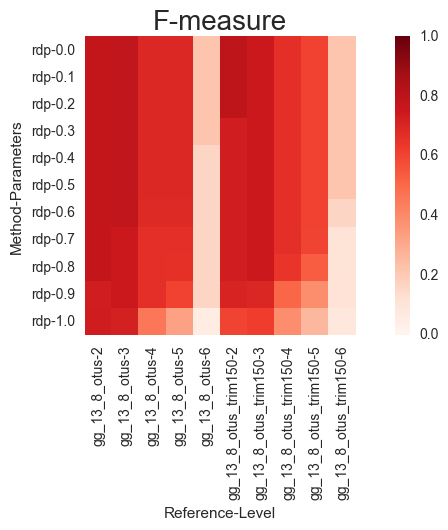

In [52]:
heatmap_from_data_frame(mock_results, metric="F-measure", rows=["Method", "Parameters"], cols=["Reference", "Level"])

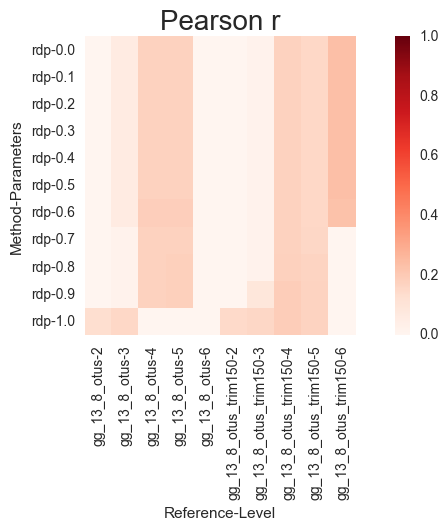

In [53]:
heatmap_from_data_frame(mock_results, metric="Pearson r", rows=["Method", "Parameters"], cols=["Reference", "Level"])

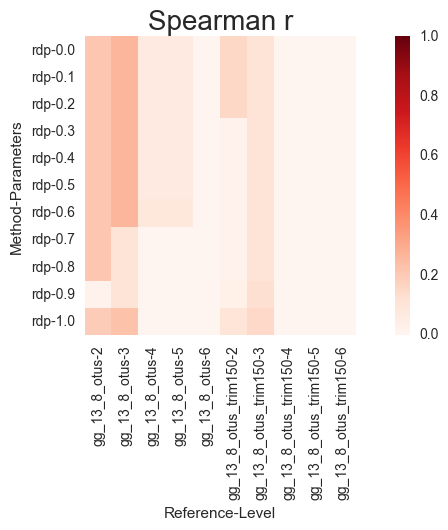

In [54]:
heatmap_from_data_frame(mock_results, metric="Spearman r", rows=["Method", "Parameters"], cols=["Reference", "Level"])

Now we will focus on results at genus level (for species level, change to level 6)

In [63]:
mock_results_6 = mock_results[mock_results['Level'] == 5]

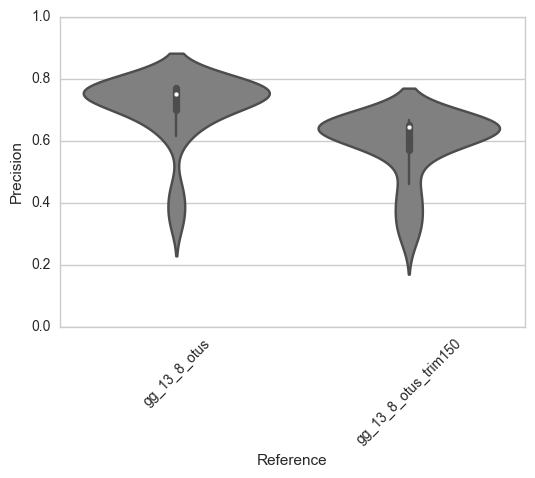

In [64]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="Precision")

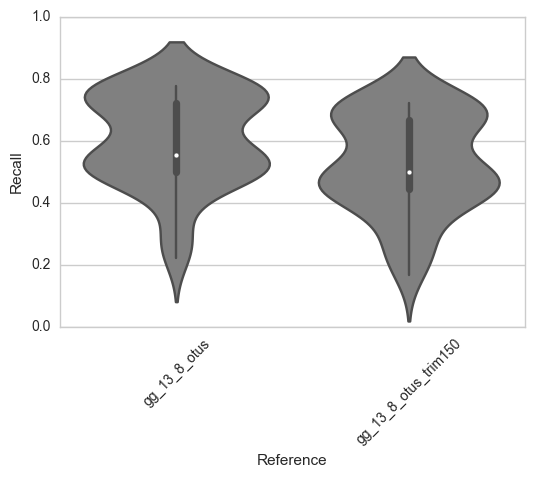

In [65]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="Recall")

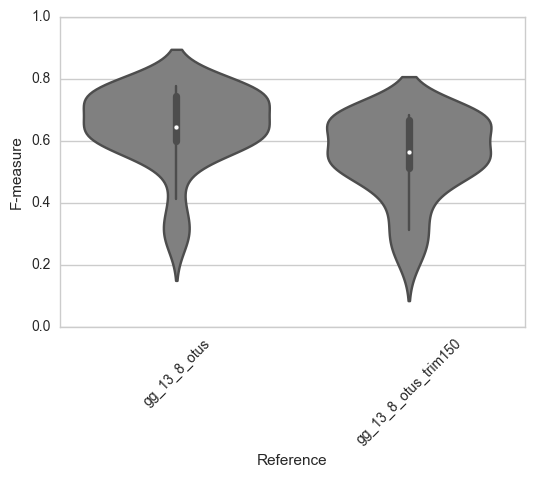

In [66]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="F-measure")

In [70]:
for dataset in mock_results['Reference'].unique():
    for level in range(4,7):
        method_rank = method_by_dataset(mock_results[mock_results["Level"] == level],
                                        group_by = 'Reference',
                                        dataset=dataset, sort_field="F-measure",
                                        display_fields=("Method", "Parameters", "Precision", "Recall", "F-measure"))
        print("{0} level {1}".format(dataset, level))
        display(method_rank)

gg_13_8_otus level 4


Method Parameters  Precision    Recall  F-measure
1654    rdp        0.1   0.777778  0.777778   0.777778

gg_13_8_otus level 5


Method Parameters  Precision    Recall  F-measure
1658    rdp        0.1   0.777778  0.777778   0.777778

gg_13_8_otus level 6


Method Parameters  Precision  Recall  F-measure
1642    rdp        0.0   0.238095    0.25   0.243902

gg_13_8_otus_trim150 level 4


Method Parameters  Precision    Recall  F-measure
2994    rdp        0.3        0.7  0.777778   0.736842

gg_13_8_otus_trim150 level 5


Method Parameters  Precision    Recall  F-measure
2998    rdp        0.3       0.65  0.722222   0.684211

gg_13_8_otus_trim150 level 6


Method Parameters  Precision  Recall  F-measure
2942    rdp        0.0   0.238095    0.25   0.243902

Evaluation 2: Compute and summarize correlations between observed and known mock community structure
----------------------------------------------------------------------------------------------------

In this evaluation, we compute and summarize the correlation between each result (pre-computed and query) and the known composition of the mock communities. We then summarize the results in two ways: first with a series of boxplots of correlation coefficients by method; and second with a table of the top methods based on their Pearson correlation coefficient. 

This is a quantitative evaluation, which tells us about the ability of the different methods to report the taxa that are present in each sample and accurately assess their abundance. Because many factors can affect the observed abundance of taxa beyond the accuracy of the taxonomic assigner (e.g., primer bias), the correlation coefficients are frequently low, but we expect that their relative values are informative in understanding which taxonomic assigners are more correct than others.

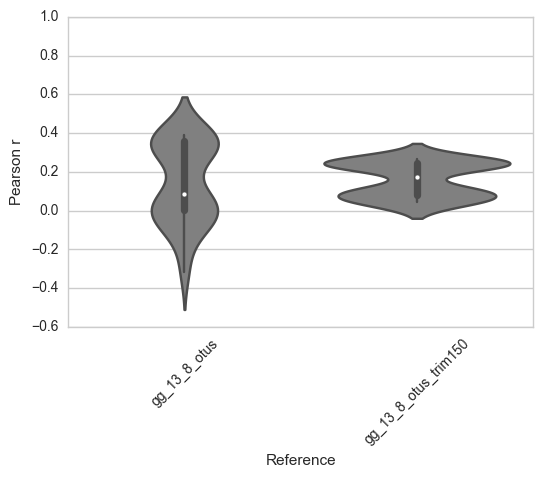

In [71]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="Pearson r", y_min=None)

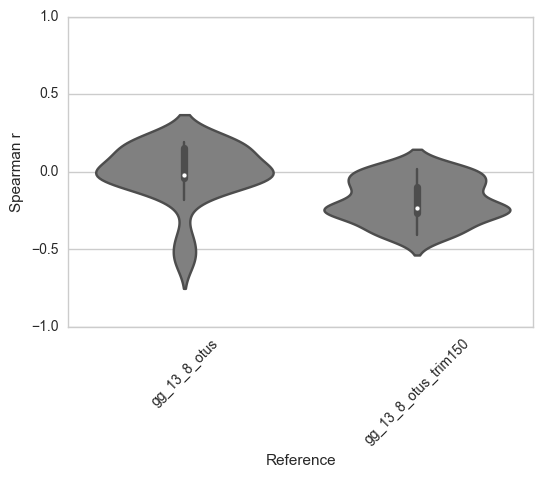

In [72]:
boxplot_from_data_frame(mock_results_6, group_by="Reference", metric="Spearman r", y_min=None)

In [75]:
for dataset in mock_results['Reference'].unique():
    for level in range(4,7):
        method_rank = method_by_dataset(mock_results[mock_results["Level"] == level],
                                        group_by = 'Reference',
                                        dataset=dataset, sort_field="Pearson r",
                                        display_fields=("Method", "Parameters", "Pearson r", "Spearman r"))
        print("{0} level {1}".format(dataset, level))
        display(method_rank)

gg_13_8_otus level 4


Method Parameters  Pearson r  Spearman r
1735    rdp        0.5   0.391116    0.189545

gg_13_8_otus level 5


Method Parameters  Pearson r  Spearman r
1739    rdp        0.5   0.391116    0.189545

gg_13_8_otus level 6


Method Parameters  Pearson r  Spearman r
1744    rdp        0.5   -0.05041   -0.574219

gg_13_8_otus_trim150 level 4


Method Parameters  Pearson r  Spearman r
3135    rdp        1.0    0.31669   -0.115529

gg_13_8_otus_trim150 level 5


Method Parameters  Pearson r  Spearman r
3139    rdp        1.0   0.263707   -0.396348

gg_13_8_otus_trim150 level 6


Method Parameters  Pearson r  Spearman r
3064    rdp        0.6   0.442654   -0.544173